Dieses Notebook analysiert Produktpreise von **Hofer**, **Billa** und **Spar** – drei bekannten Supermärkten in Österreich.  
Die Datengrundlage wurde zuvor per **automatisiertem Web Scraping** gesammelt und in einer **MongoDB-Datenbank** gespeichert.

Wir verbinden uns mit der MongoDB-Datenbank und lesen die Produktdaten in ein `pandas` DataFrame ein.
Diese strukturierte Datenbasis bildet das Fundament für unsere Analyse.


In [8]:
!pip install seaborn
import seaborn as sns

!pip install pymongo
from pymongo import MongoClient
import pandas as pd
!pip install matplotlib

import matplotlib.pyplot as plt

In [9]:
# Verbindung zur lokalen MongoDB-Datenbank
client = MongoClient("mongodb://localhost:27017/")
db = client["lebensmittel"]
collection = db["produkte"]

Jede Produktliste stammt aus einer separaten Collection (Billa, Hofer, Spar).
Wir ergänzen eine eindeutige **"Supermarkt"-Spalte**, um die Daten später sauber vergleichen zu können.

In [10]:
# Daten aus den 3 Supermarkt-Collections holen
hofer = pd.DataFrame(list(db["hofer"].find()))
billa = pd.DataFrame(list(db["billa"].find()))
spar = pd.DataFrame(list(db["spar"].find()))

# Jeder DataFrame bekommt eine Spalte "Supermarkt"
hofer["Supermarkt"] = "Hofer"
billa["Supermarkt"] = "Billa"
spar["Supermarkt"] = "Spar"

In [13]:
print(df.columns)

Index(['Produkt', 'Preis', 'Supermarkt'], dtype='object')


In [14]:
# Alle Daten in einem DataFrame bündeln
df = pd.concat([hofer, billa, spar], ignore_index=True)
#Nach Spalten filtern
df = df[["Produkt", "Preis", "Supermarkt"]]

Die Preisspalte enthält Formatierungen wie `€` und Kommas.  
Wir bereinigen diese Angaben und wandeln sie in **numerische Werte** (Floats) um, um sie für Berechnungen und Visualisierungen zu nutzen.

In [15]:
df["Preis"] = (
    df["Preis"]
    .astype(str)
    .str.replace("€", "", regex=False)
    .str.replace(",", ".", regex=False) #Kommas werden zu Punkten geändert, um im folgenden Strings zu floats zu konvertieren
    .str.replace(r"[^\d.]", "", regex=True)
    .str.strip()
)
df["Preis"] = pd.to_numeric(df["Preis"], errors="coerce")
#ungültige Einträge rausfiltern
df = df[df["Preis"].notna()]

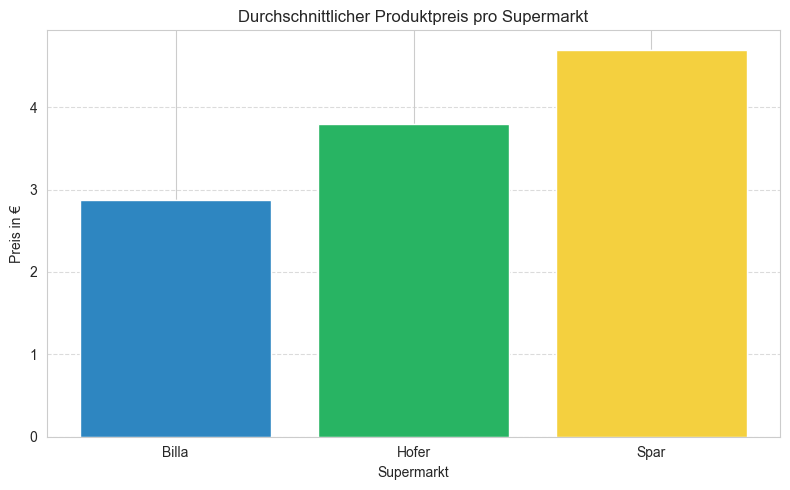

In [19]:
avg_prices = df.groupby("Supermarkt")["Preis"].mean()

plt.figure(figsize=(8, 5))
plt.bar(avg_prices.index, avg_prices.values, color="skyblue")
plt.title("Durchschnittlicher Produktpreis pro Supermarkt")
plt.ylabel("Preis in €")
plt.xlabel("Supermarkt")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
colors = ["#2E86C1", "#28B463", "#F4D03F"]
plt.bar(avg_prices.index, avg_prices.values, color=colors)
plt.show()

Ein **Balkendiagramm** zeigt den **durchschnittlichen Preis pro Supermarkt**.  
So lässt sich auf einen Blick erkennen, welcher Markt im Schnitt am günstigsten oder teuersten ist.

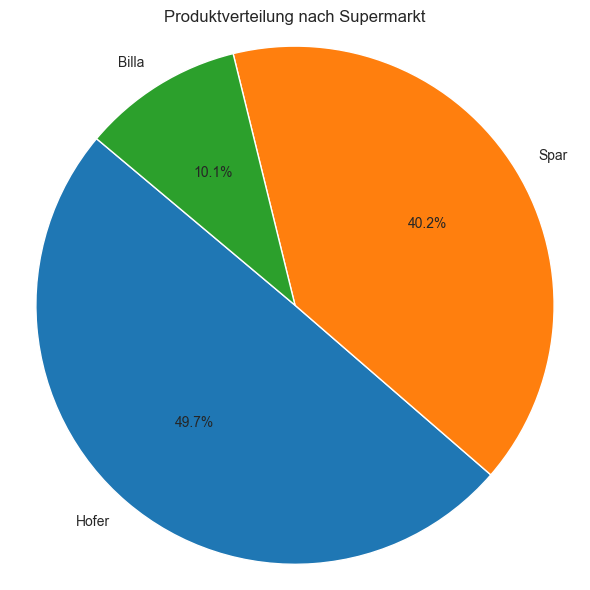

In [17]:
verteilung_produkte = df["Supermarkt"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    verteilung_produkte.values,
    labels=verteilung_produkte.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Produktverteilung nach Supermarkt")
plt.axis("equal")
plt.tight_layout()
plt.show()

In diesem Kreisdiagramm analysieren wir die Anzahl der Produkte, die aus den drei Supermärkten **Hofer**, **Billa** und **Spar** in unserer Datenbank enthalten sind.

- **Hofer** ist mit fast 50 % der Produkte am stärksten vertreten.
- **Spar** liefert ebenfalls eine große Produktvielfalt.
- **Billa** hat aktuell nur einen kleinen Anteil an erfassten Produkten.

Diese ungleiche Verteilung kann mehrere Gründe haben:
- Unterschiede im **Sortiment** der Märkte,
- oder in der **Datenverfügbarkeit** bzw. im **Scraping-Erfolg**.


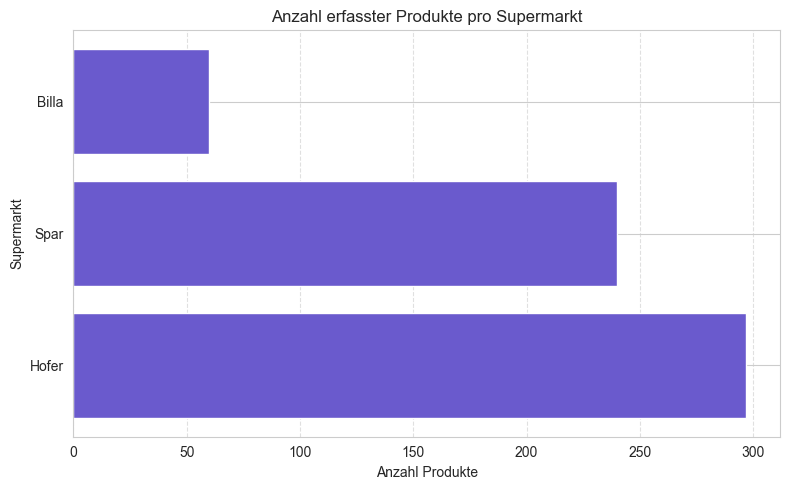

In [18]:
anzahl_produkte = df["Supermarkt"].value_counts()

plt.figure(figsize=(8, 5))
plt.barh(anzahl_produkte.index, anzahl_produkte.values)
plt.title("Anzahl erfasster Produkte pro Supermarkt")
plt.xlabel("Anzahl Produkte")
plt.ylabel("Supermarkt")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Ein **horizontales Balkendiagramm** stellt die **absolute Anzahl an Produkten** je Supermarkt dar.
Dies hilft dabei, die Datenbasis zu bewerten – besonders, wenn man Preisvergleiche relativiert oder Datenlücken identifizieren möchte.


Mit Hilfe von **Python**, **MongoDB**, `pandas` und `matplotlib` haben wir zentrale Unterschiede zwischen den drei Supermärkten sichtbar gemacht.

- Die **durchschnittlichen Preise** variieren deutlich zwischen Hofer, Billa und Spar.
- Es gibt **große Unterschiede in der Datenmenge pro Supermarkt**, was auf das Sortiment oder technische Hürden beim Scraping hindeutet.

Diese Analyse schafft eine datenbasierte Grundlage, um Konsumentscheidungen zu unterstützen und die Marktposition der Anbieter objektiv zu vergleichen.
